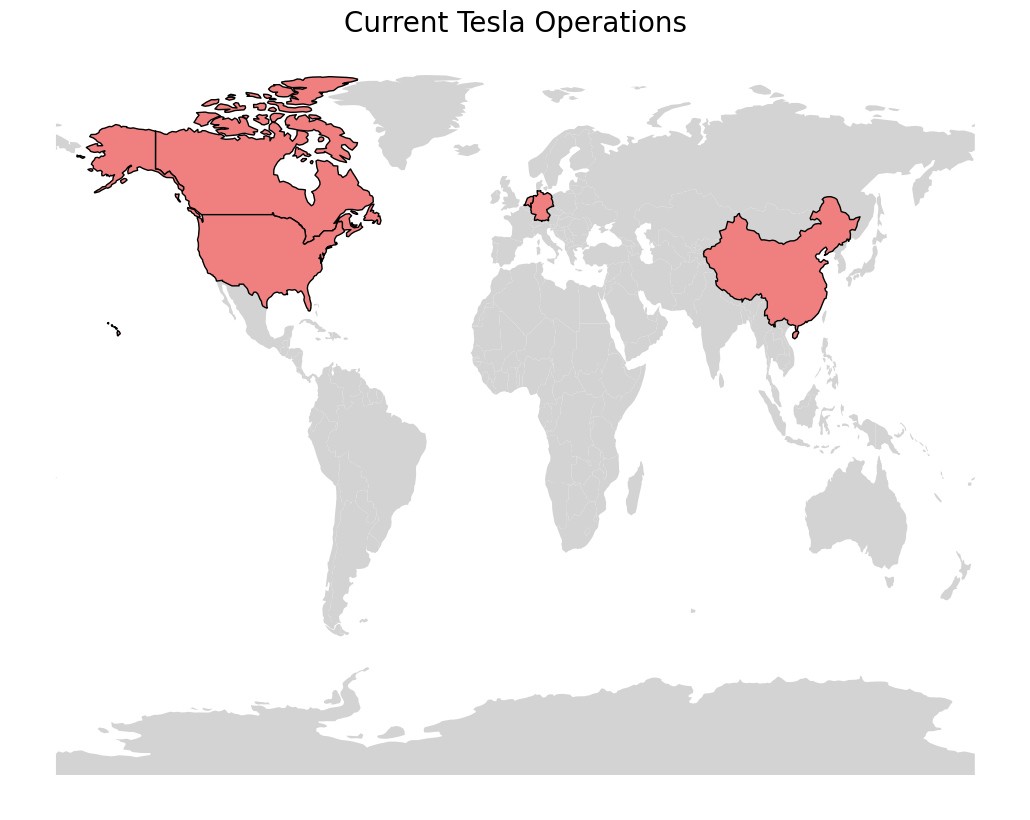

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import requests

shapefile_dir = "/content/geodata"
os.makedirs(shapefile_dir, exist_ok=True)

base_url = "https://raw.githubusercontent.com/EricVMag/Python-Projects/main/resources/Geodata"

shapefile_files = [
    "ne_110m_admin_0_countries.shp",
    "ne_110m_admin_0_countries.shx",
    "ne_110m_admin_0_countries.dbf",
    "ne_110m_admin_0_countries.prj",
    "ne_110m_admin_0_countries.cpg"
]

for file_name in shapefile_files:
    url = f"{base_url}/{file_name}"
    local_path = os.path.join(shapefile_dir, file_name)
    response = requests.get(url)
    with open(local_path, 'wb') as f:
        f.write(response.content)

shapefile_path = os.path.join(shapefile_dir, "ne_110m_admin_0_countries.shp")
world = gpd.read_file(shapefile_path)

tesla_countries = ['United States of America', 'China', 'Canada', 'Germany', 'Netherlands']
world['highlight'] = world['NAME'].isin(tesla_countries)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = world.plot(ax=ax, color='lightgrey')
highlighted = world[world['highlight']].plot(ax=base, color='lightcoral', edgecolor='black')

ax.set_axis_off()
ax.set_title('Current Tesla Operations', fontsize=20)

plt.show()


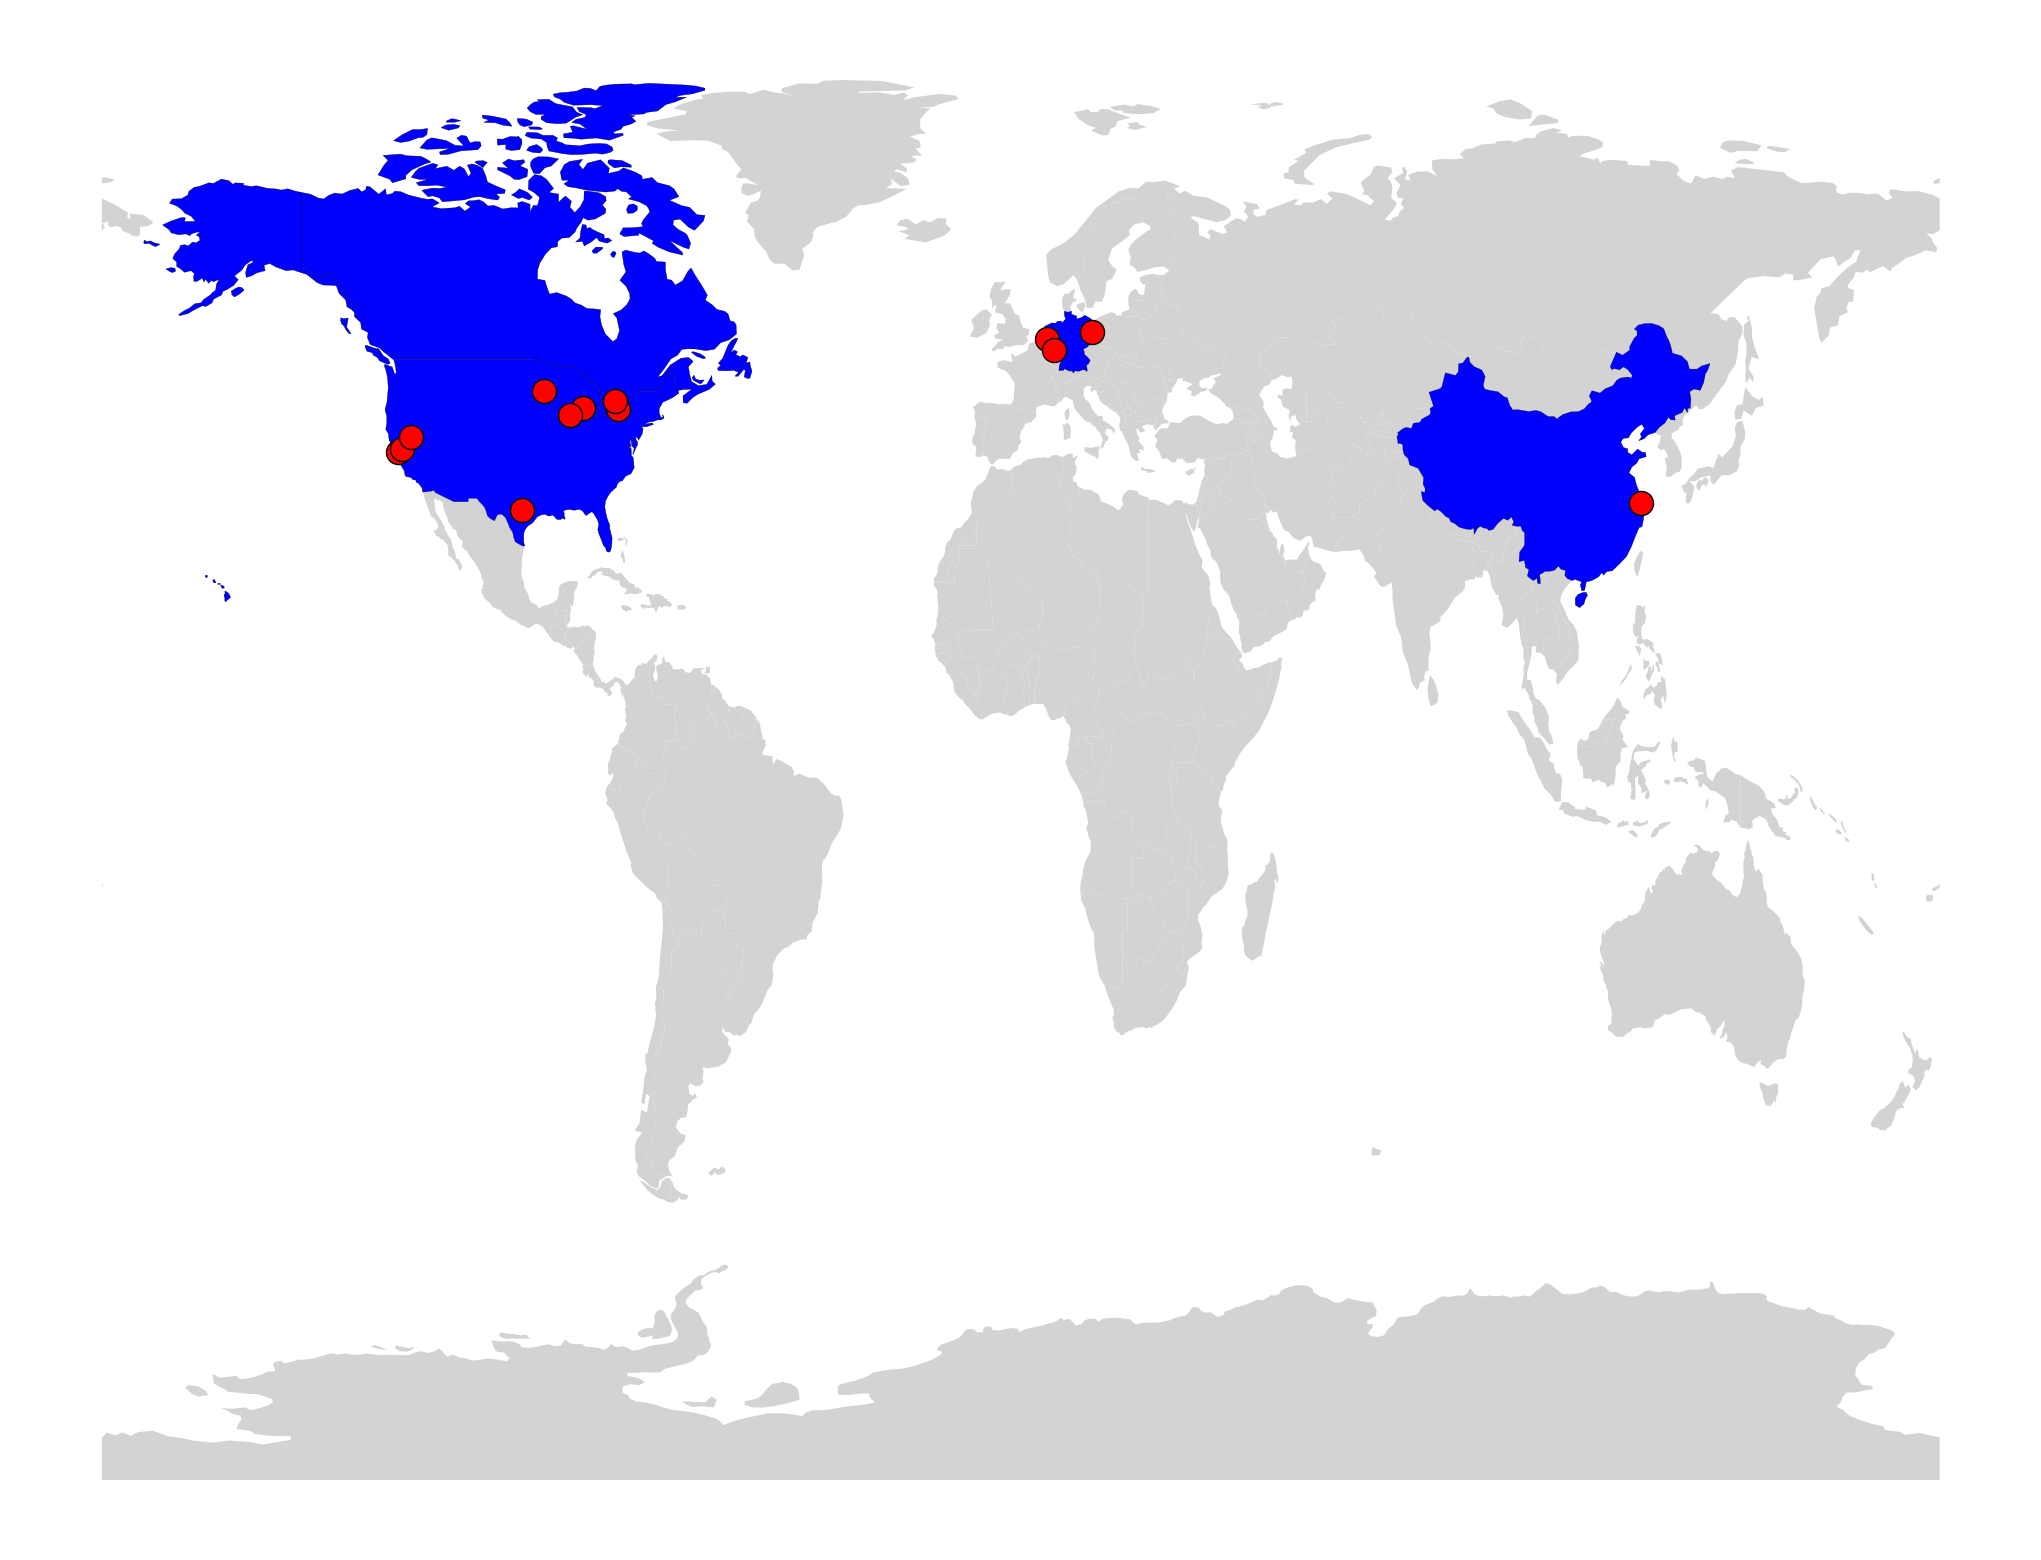

In [6]:
shapefile_dir = "/content/geodata"
os.makedirs(shapefile_dir, exist_ok=True)

base_url = "https://raw.githubusercontent.com/EricVMag/Python-Projects/main/resources/Geodata"

shapefile_files = [
    "ne_110m_admin_0_countries.shp",
    "ne_110m_admin_0_countries.shx",
    "ne_110m_admin_0_countries.dbf",
    "ne_110m_admin_0_countries.prj",
    "ne_110m_admin_0_countries.cpg"
]

for file_name in shapefile_files:
    url = f"{base_url}/{file_name}"
    local_path = os.path.join(shapefile_dir, file_name)
    response = requests.get(url)
    with open(local_path, 'wb') as f:
        f.write(response.content)

shapefile_path = os.path.join(shapefile_dir, "ne_110m_admin_0_countries.shp")
world = gpd.read_file(shapefile_path)

# Where Tesla operates
tesla_countries = ['United States of America', 'China', 'Canada', 'Germany', 'Netherlands']

# Highlighting Tesla operations
world['highlight'] = world['NAME'].isin(tesla_countries)

# Pin locations
locations = {
    'Fremont, California': (-121.9886, 37.5485),
    'Lathrop, California': (-121.2780, 37.8227),
    'Tilburg, Netherlands': (5.0828, 51.5606),
    'Grand Rapids, Michigan': (-85.6681, 42.9634),
    'Storey County, Nevada': (-119.5308, 39.3163),
    'Buffalo, New York': (-78.8784, 42.8864),
    'Brooklyn Park, Minnesota': (-93.3573, 45.0941),
    'Elgin, Illinois': (-88.2812, 42.0354),
    'Prum, Germany': (6.4219, 50.2107),
    'Richmond Hill, Ontario': (-79.4378, 43.8828),
    'Shanghai, China': (121.4737, 31.2304),
    'Grunheide, Germany': (13.8757, 52.3806),
    'Austin, Texas': (-97.7431, 30.2672)#,
}

# Plot
fig, ax = plt.subplots(1, 1, figsize=(40, 20))
base = world.plot(ax=ax, color='lightgrey')
highlighted = world[world['highlight']].plot(ax=base, color='blue', edgecolor='black', linewidth=0.2)
ax.set_axis_off()


# Add pins
for lon, lat in locations.values():
    plt.scatter(lon, lat, color='red', s=300, edgecolor='black', zorder=3)

plt.show()


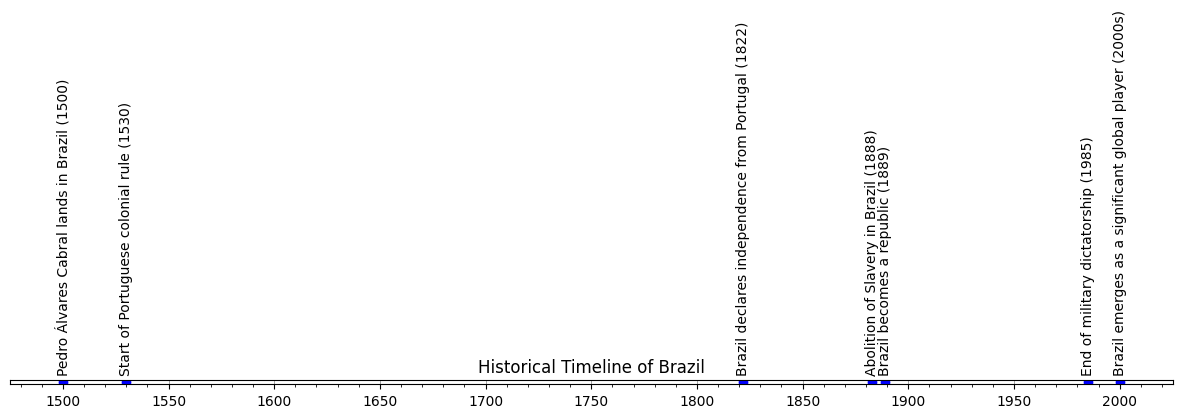

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# This is a simple timeline of important events in Brazilian history.
events = [
    "Pedro Álvares Cabral lands in Brazil (1500)",
    "Start of Portuguese colonial rule (1530)",
    "Brazil declares independence from Portugal (1822)",
    "Abolition of Slavery in Brazil (1888)",
    "Brazil becomes a republic (1889)",
    "End of military dictatorship (1985)",
    "Brazil emerges as a significant global player (2000s)"
]
dates = [
    "1500",
    "1530",
    "1822",
    "1883",
    "1889",
    "1985",
    "2000"
]

dates = [datetime.strptime(date, "%Y") for date in dates]

fig, ax = plt.subplots(figsize=(15, 0.05))

ax.plot(dates, [0] * len(dates), color="blue", marker='o', linestyle='none')

for date, event in zip(dates, events):
    ax.text(date, 0.2, event, rotation=90, ha="center", va="bottom")

ax.yaxis.set_visible(False)

ax.xaxis.set_major_locator(mdates.YearLocator(50))
ax.xaxis.set_minor_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')
ax.set_title('Historical Timeline of Brazil')

plt.show()
